# R이해하기
> ## 6. 데이터 다루기(Data Manipulation)
> ## 7. 탐색적 데이터 분석(EDA; Exploratory Data Analysis)
> ## 8. 데이터 전처리(Preprocessing)
> ## 9. 통계 이해하기

---
## 6. 데이터 다루기
> ### 6.1 데이터 조작(Data manipulation)
> ### 6.2 데이터 재구성(Data reshape)

### 6.1 데이터 조작(Data manipulation)

In [12]:
# 벡터형태의 변수 생성
x <- c(10 : 1)
y <- -4: 5
q <- c("A팀장", "C팀원", "B팀장", "D팀원", 
       "자문A", "자문B", "A", "C팀장", "B", "C")

# 벡터형태의 데이터 데이터프레임(dataframe) 형식으로 변경 결합
df <- data.frame("order" = x,  "socre" = y,  "who" = q)

# head 함수로 데이터 첫행부터 세번째 행까지 확인
head(df, 3)

# tail 함수로 데이터 가장 마지막 행에서 부터 위로 세번째 행까지 확인
tail(df, 3)

order,socre,who
10,-4,A팀장
9,-3,C팀원
8,-2,B팀장


,order,socre,who
8,3,3,C팀장
9,2,4,B
10,1,5,C


In [13]:
# 행(row) 의 갯수 확인 함수
nrow(df)

[1] 10

In [4]:
# 열(column)의 갯수 확인 함수
ncol(df)

[1] 3

In [5]:
# 차원(dimension) 함수
dim(df)

[1] 10  3

In [6]:
# 변수 이름 확인 함수
names(df)

[1] "order" "socre" "who"

In [7]:
# 열(column)의 이름 확인 함수
colnames(df)

[1] "order" "socre" "who"

In [8]:
# 행의 이름 확인 함수 
# (행의 경우 주어진 경우가 아니면 초기값(defalut) 으로 설정되어 있음)
rownames(df)

[1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10"

In [11]:
rownames(df) <- c("a", "b", "c", "d", "e", "f", "g", "h", "i", "j")
head(df, 3)

,order,socre,who
a,10,-4,A팀장
b,9,-3,C팀원
c,8,-2,B팀장


In [14]:
rownames(df) <- NULL
head(df, 3)

order,socre,who
10,-4,A팀장
9,-3,C팀원
8,-2,B팀장


In [16]:
#class함수로 데이터형식을 확인
class(df)

[1] "data.frame"

In [17]:
# str함수로 데이터 구조 확인
str(df)

'data.frame':	10 obs. of  3 variables:
 $ order: int  10 9 8 7 6 5 4 3 2 1
 $ socre: int  -4 -3 -2 -1 0 1 2 3 4 5
 $ who  : Factor w/ 10 levels "자문A","자문B",..: 4 8 6 10 1 2 3 9 5 7


In [19]:
# 데이터에서 일부 확인
# 대활호 [ ] 사용
df[3, 1:3]

,order,socre,who
3,8,-2,B팀장


In [21]:
# 행자리에 아무것도 표시히지 않으면 전체
# 열에는 몇번째 인지 포함
df[, 3]

[1] A팀장 C팀원 B팀장 D팀원 자문A 자문B A     C팀장 B     C    
Levels: 자문A 자문B A A팀장 B B팀장 C C팀원 C팀장 D팀원

In [24]:
# 특정 변수명을 알고 있다면 문자열로 표시
df[, "who"]

[1] A팀장 C팀원 B팀장 D팀원 자문A 자문B A     C팀장 B     C    
Levels: 자문A 자문B A A팀장 B B팀장 C C팀원 C팀장 D팀원

In [25]:
df[["who"]]

[1] A팀장 C팀원 B팀장 D팀원 자문A 자문B A     C팀장 B     C    
Levels: 자문A 자문B A A팀장 B B팀장 C C팀원 C팀장 D팀원

In [28]:
# 데이터프레임 구조 유지 한상태로 확인
df["who"]

who
A팀장
C팀원
B팀장
D팀원
자문A
자문B
A
C팀장
B
C


In [29]:
#  세번째 매개변수(third argument: drop = FALSE) 
# 데이터 프레임 형식으로 보여줌
df[, "who", drop = FALSE]

who
A팀장
C팀원
B팀장
D팀원
자문A
자문B
A
C팀장
B
C


In [22]:
# 코딩의 시안성을 높이기 위한 
# 파이프연산자(pip operator) : %>%
# 활용을 위해서는 패키지 설치 필요
library(magrittr)

df[, c("order", "who")] %>% head(3)

order,who
10,A팀장
9,C팀원
8,B팀장


In [30]:
# 변수별 그룹으로 다루기(Group Manipulation)
# apply Family : apply, tapply, lapply, mapply

# apply

mat <- matrix(1:12, nrow = 3)
mat[2,2] <- NA
mat

1,4,7,10
2,NA,8,11
3,6,9,12


In [32]:
# apply 함수를 활용해 행별 특정 함수 적용
apply(mat, 1, sum)

# apply 함수를 활용해 열별 특정함수 적용
# na.rm 매개변수에 대한 조건을 TRUE로 줄경우 NA를 빼고 계산
apply(mat, 2, sum, na.rm = TRUE)

[1] 22 NA 30

[1]  6 10 24 33

In [33]:
# 행별 합을 계산하는 경우
rowSums(mat)

[1] 22 NA 30

In [35]:
# 열별 합을 계산하는 경우
colSums(mat, na.rm = TRUE)

[1]  6 10 24 33

In [37]:
# 리스트 형태의 데이터 생성
lst <- list(a = matrix(1:6, 2), b = 1:4, c = matrix(1:8, 2), d = 2)
lst

$a
     [,1] [,2] [,3]
[1,]    1    3    5
[2,]    2    4    6

$b
[1] 1 2 3 4

$c
     [,1] [,2] [,3] [,4]
[1,]    1    3    5    7
[2,]    2    4    6    8

$d
[1] 2

In [40]:
# lapply함수를 활용하여 리스트 형식에 함수 반복 연산
lapply(lst, sum)

$a
[1] 21

$b
[1] 10

$c
[1] 36

$d
[1] 2

In [45]:
# sapply함수를 활용하여 리스트 형식에 대한 함수 반복연산
# 결과를 벡터로 산출
sapply(lst, sum)

a  b  c  d 
21 10 36  2

In [47]:
# 리스트 변수 생성
lst1 <- list(a = matrix(1:12, 4), b = matrix(1:16, 2), c = 1:5)
lst2 <- list(a = matrix(1:12, 4), b = matrix(1:16, 8), c = 1:5)

In [48]:
# 두 리스트에 각각 특정함수 적용
mapply(identical, lst1, lst2)

a     b     c 
 TRUE FALSE  TRUE

In [49]:
# apply 류의 함수에 생성한 함수 적용 가능
simple_func <- function(x, y) {
    nrow(x) + nrow(y)
}

mapply(simple_func, lst1, lst2)

$a
[1] 8

$b
[1] 10

$c
integer(0)

#### purrr package

| 함수(function) | 결과 형태(output Type) |
|---|----|
|map     | list  |
| map_int| integer  | 
|map_dbl   | numeric  | 
|map_char| character |
|map_lgl | logical |
|map_df | data.frame |

In [60]:
# purrr패키지를 활용하여 함수 적용 가능
library(purrr)

lst %>% map(sum) # map(lst, sum)과 동일

$a
[1] 136

$b
[1] NA

$c
[1] 45

$D
[1] NA

In [61]:
# list 형태의 데이터 생성
lst <- list(a = matrix(1:16, 4), 
            b = c(1:5, NA, 7: 8), 
            c = matrix(1:9, 3), 
            D = NA)

# map함수를 활용하여 연산
lst %>% map(function(x) sum(x, na.rm = TRUE))

$a
[1] 136

$b
[1] 30

$c
[1] 45

$D
[1] 0

In [62]:
# 리스트 형태의 데이터 결과
# nrow함수는 대문자
# 결과값을 정수(integer)
lst %>% map_int(NROW)

a b c D 
4 8 3 1

In [63]:
# 결과값을 실수
lst %>% map_dbl(mean)

a   b   c   D 
8.5  NA 5.0  NA

In [64]:
# 결과값을 문자열
lst %>% map_chr(class)

a         b         c         D 
 "matrix" "integer"  "matrix" "logical"

In [66]:
# 연산에 조건을 추가하여 논리연산자 활용
lst %>% map_lgl(function(x) NROW(x) < 3)

[1] TRUE TRUE TRUE

In [70]:
# list함수 활용하여 리스트 타입 데이터 생성
lst <- list(3, 2, 3)

# 함수 정의 통해서 함수활용
make_df <- function(x) {
    data.frame(a = 1:x, b = x:1)
}

In [69]:
# list 데이터에 map함수를 활용하여 리스트 순서별 데이터 생성
lst %>% map(make_df)

a,b
1,3
2,2
3,1
a,b
1,2
2,1
a,b
1,3
2,2
3,1


In [71]:
lst <- list(a = matrix(1:16, 4), b = c(1:5), c = matrix(1:9, 3))
lst

$a
     [,1] [,2] [,3] [,4]
[1,]    1    5    9   13
[2,]    2    6   10   14
[3,]    3    7   11   15
[4,]    4    8   12   16

$b
[1] 1 2 3 4 5

$c
     [,1] [,2] [,3]
[1,]    1    4    7
[2,]    2    5    8
[3,]    3    6    9

In [73]:
# 행렬형태의 데이터의 경우에만 함수 적용
lst %>% map_if(is.matrix, function(x) x**2)

$a
     [,1] [,2] [,3] [,4]
[1,]    1   25   81  169
[2,]    4   36  100  196
[3,]    9   49  121  225
[4,]   16   64  144  256

$b
[1] 1 2 3 4 5

$c
     [,1] [,2] [,3]
[1,]    1   16   49
[2,]    4   25   64
[3,]    9   36   81

### 6.2 데이터 재구성(Data reshaping)

In [74]:
# 문자열로된 벡터 데이터 생성
model <- c("SVM", "RandomForest", "linear_regression")
category <- c("classfication", "classfication", "regression")
approach <- c("a", "a", "s")

# cbind 함수를 활용하여 벡터 데이터 결합
# 동일길이의 벡터인 경우 열로 결합
cb <- cbind(model, category, approach)
cb

model,category,approach
SVM,classfication,a
RandomForest,classfication,a
linear_regression,regression,s


In [75]:
# data.frame함수를 활용하여 데이터 프레임형식의 데이터 생성
df <- data.frame(model = c("logistic_regression", "xgb", "SVR"), 
           category =  c("classfication", "classfication", "regression"), 
           approach = c("a", "a", "s"))
df

model,category,approach
logistic_regression,classfication,a
xgb,classfication,a
SVR,regression,s


In [6]:
# cbind 함수를 활용하여 벡터 데이터 결합
# 동일길이의 벡터인 경우 열로 결합
rbind(cb, df)

model,category,approach
SVM,classfication,a
RandomForest,classfication,a
linear_regression,regression,s
logistic_regression,classfication,a
xgb,classfication,a
SVR,regression,s


In [76]:
# 데이터 읽어들이기
# source : kaggle
# https://www.kaggle.com/arielcedola/
# solar-generation-and-demand-italy-20152016/
# downloads/solar-generation-and-demand-italy-20152016.zip/1

# file.path함수 활용하여 경로구분자에 대한 운영체제에 따른 문제 방지
p1 <- file.path("DATA", 
          "solar-generation-and-demand-italy-20152016", 
         "TimeSeries_TotalSolarGen_and_Load_IT_2015.csv")
p2 <- file.path("DATA", 
          "solar-generation-and-demand-italy-20152016", 
         "TimeSeries_TotalSolarGen_and_Load_IT_2016.csv")

# read.csv함수로 데이터 읽어서 변수로 저장
it_2015 <- read.csv(p1)
it_2016 <- read.csv(p2)

In [77]:
# 데이터에서 행과 열을 확인
dim(it_2015)
head(it_2015, 3)
dim(it_2016)
head(it_2016, 3)

[1] 8760    3

utc_timestamp,IT_load_new,IT_solar_generation
2015-01-01T00:00:00Z,NA,0
2015-01-01T01:00:00Z,NA,0
2015-01-01T02:00:00Z,NA,0


[1] 8784    3

utc_timestamp,IT_load_new,IT_solar_generation
2016-01-01T00:00:00Z,21665,1
2016-01-01T01:00:00Z,20260,0
2016-01-01T02:00:00Z,19056,0


In [78]:
# 데이터 결합
# rbind함수를 활용해 동일한 열인 경우 아래에 데이터 결합
it_data <- rbind(it_2015, it_2016)
head(it_data)

dim(it_data)

utc_timestamp,IT_load_new,IT_solar_generation
2015-01-01T00:00:00Z,NA,0
2015-01-01T01:00:00Z,NA,0
2015-01-01T02:00:00Z,NA,0
2015-01-01T03:00:00Z,NA,0
2015-01-01T04:00:00Z,NA,0
2015-01-01T05:00:00Z,NA,0


[1] 17544     3

In [79]:
# 현장데이터 읽어들이기
library(readxl)

raw <- read_excel('DATA/SK_sample_DATA/data_samples.xlsx')
add_info <-  read_excel('DATA/SK_sample_DATA/data_samples.xlsx',
                        sheet = 2)

In [82]:
# 데이터 확인
head(raw, 3)
tail(raw, 3)

Date,Y,x1,x2,x3,x4,x5,x6,x7,x8,...,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61
2016-01-01,7.9250,7.9032,539.985,692.547,74.4483,0.4902,50.6771,75.0592,44.9749,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2016-01-02,7.9708,7.9372,539.977,692.549,74.8442,0.4926,50.1147,75.0692,44.9595,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2016-01-03,8.0370,7.9719,539.982,692.858,75.1641,0.4902,50.3010,75.0966,44.9862,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


Date,Y,x1,x2,x3,x4,x5,x6,x7,x8,...,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61
2018-04-20,7.8142,7.9673,538.986,693.177,77.5785,0.5095,48.6251,75.0197,45.0475,...,4747,1.09,327,2122,3614,3614,918,36.8,0.99,5133
2018-04-21,7.8227,7.9621,538.993,693.892,77.5228,0.5095,48.9683,75.0264,45.0557,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2018-04-22,7.8910,7.9695,538.993,694.687,77.6098,0.5094,47.8623,74.9754,45.0378,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [83]:
# 데이터 구조 확인
str(raw)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	803 obs. of  63 variables:
 $ Date: chr  "2016-01-01" "2016-01-02" "2016-01-03" "2016-01-04" ...
 $ Y   : num  7.92 7.97 8.04 8 8 ...
 $ x1  : num  7.9 7.94 7.97 7.9 7.84 ...
 $ x2  : num  540 540 540 540 540 ...
 $ x3  : num  693 693 693 694 694 ...
 $ x4  : num  74.4 74.8 75.2 74.4 73.9 ...
 $ x5  : num  0.49 0.493 0.49 0.491 0.488 ...
 $ x6  : num  50.7 50.1 50.3 50.5 50.6 ...
 $ x7  : num  75.1 75.1 75.1 75 75.1 ...
 $ x8  : num  45 45 45 45 45 ...
 $ x9  : num  27000 27000 27000 27000 27046 ...
 $ x10 : num  6.2 6.26 6.14 5.97 5.89 ...
 $ x11 : num  51597 51958 53374 53610 53712 ...
 $ x12 : num  48161 49138 51569 49198 48981 ...
 $ x13 : num  69570 69741 68919 69473 69801 ...
 $ x14 : num  71449 71393 70760 71168 71504 ...
 $ x15 : num  91855 92026 92565 92643 93033 ...
 $ x16 : num  724 725 726 727 728 ...
 $ x17 : num  2.61 2.62 2.61 2.6 2.6 ...
 $ x18 : num  689 689 690 690 691 ...
 $ x19 : num  719 719 720 722 722 ...
 $ x20 : num  69

In [84]:
# 엑셀파일의 다른 시트의 내용 확인
head(add_info)
str(add_info)

Date,x62,x63,x64
2016-01-01,0.000000000,0.0,606.34
2016-01-02,0.000000000,0.0,606.82
2016-01-03,0.000000000,0.0,606.44
2016-01-04,0.000000000,0.0,605.76
2016-01-05,0.000000000,0.0,606.09
2016-01-06,0.001484788,0.9,607.09


Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	803 obs. of  4 variables:
 $ Date: POSIXct, format: "2016-01-01" "2016-01-02" ...
 $ x62 : num  0 0 0 0 0 ...
 $ x63 : num  0 0 0 0 0 0.9 0 0.26 0 0 ...
 $ x64 : num  606 607 606 606 606 ...


In [85]:
# 두 데이터의 결합을 위해 각각의 데이터 키(key value)가 동일 타입이어야함


# 현제 데이터 구조확인에서 데이터 타입 형태가 다르므로 동일한 문자열로 변환
add_info$Date <- as.character(add_info$Date)

In [87]:
class(raw$Date[1])

[1] "character"

In [88]:
class(add_info$Date[1])

[1] "character"

In [92]:
# merge함수를 활용하여 데이터 결합, key 변수로 "Date" 활용
df <- merge(raw, add_info, by = "Date")
names(df)

[1] "Date" "Y"    "x1"   "x2"   "x3"   "x4"   "x5"   "x6"   "x7"   "x8"  
[11] "x9"   "x10"  "x11"  "x12"  "x13"  "x14"  "x15"  "x16"  "x17"  "x18" 
[21] "x19"  "x20"  "x21"  "x22"  "x23"  "x24"  "x25"  "x26"  "x27"  "x28" 
[31] "x29"  "x30"  "x31"  "x32"  "x33"  "x34"  "x35"  "x36"  "x37"  "x38" 
[41] "x39"  "x40"  "x41"  "x42"  "x43"  "x44"  "x45"  "x46"  "x47"  "x48" 
[51] "x49"  "x50"  "x51"  "x52"  "x53"  "x54"  "x55"  "x56"  "x57"  "x58" 
[61] "x59"  "x60"  "x61"  "x62"  "x63"  "x64"

In [91]:
# 결합 데이터 확인
head(df)

Date,Y,x1,x2,x3,x4,x5,x6,x7,x8,...,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64
2016-01-01,7.9250,7.9032,539.985,692.547,74.4483,0.4902,50.6771,75.0592,44.9749,...,NA,NA,NA,NA,NA,NA,NA,0.000000000,0.0,606.34
2016-01-02,7.9708,7.9372,539.977,692.549,74.8442,0.4926,50.1147,75.0692,44.9595,...,NA,NA,NA,NA,NA,NA,NA,0.000000000,0.0,606.82
2016-01-03,8.0370,7.9719,539.982,692.858,75.1641,0.4902,50.3010,75.0966,44.9862,...,NA,NA,NA,NA,NA,NA,NA,0.000000000,0.0,606.44
2016-01-04,7.9989,7.8980,539.980,693.570,74.4027,0.4913,50.4921,74.9977,44.9745,...,672,2753,51,604,32.62,0.93,3378,0.000000000,0.0,605.76
2016-01-05,7.9976,7.8382,539.980,694.041,73.8966,0.4879,50.6487,75.0535,44.9665,...,NA,NA,NA,NA,NA,NA,NA,0.000000000,0.0,606.09
2016-01-06,7.9730,7.8254,539.980,694.050,73.9020,0.4885,49.9815,75.1278,44.9742,...,605,2664,61,579,32.72,0.93,3651,0.001484788,0.9,607.09


In [94]:
# dplyr패키지를 통해서 left_join함수 활용한 데이터 결합
library(dplyr)

dp_df <- left_join(raw, add_info, by = c("Date")) # right_join
class(dp_df)
# str(dp_df)
head(dp_df)

[1] "tbl_df"     "tbl"        "data.frame"

Date,Y,x1,x2,x3,x4,x5,x6,x7,x8,...,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64
2016-01-01,7.9250,7.9032,539.985,692.547,74.4483,0.4902,50.6771,75.0592,44.9749,...,NA,NA,NA,NA,NA,NA,NA,0.000000000,0.0,606.34
2016-01-02,7.9708,7.9372,539.977,692.549,74.8442,0.4926,50.1147,75.0692,44.9595,...,NA,NA,NA,NA,NA,NA,NA,0.000000000,0.0,606.82
2016-01-03,8.0370,7.9719,539.982,692.858,75.1641,0.4902,50.3010,75.0966,44.9862,...,NA,NA,NA,NA,NA,NA,NA,0.000000000,0.0,606.44
2016-01-04,7.9989,7.8980,539.980,693.570,74.4027,0.4913,50.4921,74.9977,44.9745,...,672,2753,51,604,32.62,0.93,3378,0.000000000,0.0,605.76
2016-01-05,7.9976,7.8382,539.980,694.041,73.8966,0.4879,50.6487,75.0535,44.9665,...,NA,NA,NA,NA,NA,NA,NA,0.000000000,0.0,606.09
2016-01-06,7.9730,7.8254,539.980,694.050,73.9020,0.4885,49.9815,75.1278,44.9742,...,605,2664,61,579,32.72,0.93,3651,0.001484788,0.9,607.09


In [95]:
# 사전 전처리로 na, N/A의 문자열 입력값에 0으로 대체
df[is.na(df)] <- 0
head(df)
df[df == "N/A"] <- 0

Date,Y,x1,x2,x3,x4,x5,x6,x7,x8,...,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64
2016-01-01,7.9250,7.9032,539.985,692.547,74.4483,0.4902,50.6771,75.0592,44.9749,...,0,0,0,0,0.00,0.00,0,0.000000000,0.0,606.34
2016-01-02,7.9708,7.9372,539.977,692.549,74.8442,0.4926,50.1147,75.0692,44.9595,...,0,0,0,0,0.00,0.00,0,0.000000000,0.0,606.82
2016-01-03,8.0370,7.9719,539.982,692.858,75.1641,0.4902,50.3010,75.0966,44.9862,...,0,0,0,0,0.00,0.00,0,0.000000000,0.0,606.44
2016-01-04,7.9989,7.8980,539.980,693.570,74.4027,0.4913,50.4921,74.9977,44.9745,...,672,2753,51,604,32.62,0.93,3378,0.000000000,0.0,605.76
2016-01-05,7.9976,7.8382,539.980,694.041,73.8966,0.4879,50.6487,75.0535,44.9665,...,0,0,0,0,0.00,0.00,0,0.000000000,0.0,606.09
2016-01-06,7.9730,7.8254,539.980,694.050,73.9020,0.4885,49.9815,75.1278,44.9742,...,605,2664,61,579,32.72,0.93,3651,0.001484788,0.9,607.09


In [33]:
# 데이터를 읽으면서 데이터에서 문자열로 인식된 숫자값
# as.numeric함수를 활용하여
# lapply함수통해 각각의 열에 반복구문 실시하여
# as.data.frame함수 통해 데이터 프레임 형식의 데이터로 생성
# 첫번째 열은 Date로 시간이므로 제외하고 반복
df[,-1] <- as.data.frame(lapply(df[,-1], as.numeric))
df

Date,Y,x1,x2,x3,x4,x5,x6,x7,x8,...,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64
2016-01-01,7.9250,7.9032,539.985,692.547,74.4483,0.4902,50.6771,75.0592,44.9749,...,0,0,0,0,0.00,0.00,0,0.0000000000,0.00,606.34
2016-01-02,7.9708,7.9372,539.977,692.549,74.8442,0.4926,50.1147,75.0692,44.9595,...,0,0,0,0,0.00,0.00,0,0.0000000000,0.00,606.82
2016-01-03,8.0370,7.9719,539.982,692.858,75.1641,0.4902,50.3010,75.0966,44.9862,...,0,0,0,0,0.00,0.00,0,0.0000000000,0.00,606.44
2016-01-04,7.9989,7.8980,539.980,693.570,74.4027,0.4913,50.4921,74.9977,44.9745,...,672,2753,51,604,32.62,0.93,3378,0.0000000000,0.00,605.76
2016-01-05,7.9976,7.8382,539.980,694.041,73.8966,0.4879,50.6487,75.0535,44.9665,...,0,0,0,0,0.00,0.00,0,0.0000000000,0.00,606.09
2016-01-06,7.9730,7.8254,539.980,694.050,73.9020,0.4885,49.9815,75.1278,44.9742,...,605,2664,61,579,32.72,0.93,3651,0.0014847881,0.90,607.09
2016-01-07,8.0039,7.8482,539.982,694.798,73.9376,0.4864,50.4073,75.1092,44.9743,...,0,0,0,0,0.00,0.00,0,0.0000000000,0.00,605.59
2016-01-08,7.9361,7.8036,539.980,695.040,73.5583,0.4798,51.1790,75.0094,44.9592,...,638,2648,119,608,32.65,0.94,3757,0.0004307435,0.26,605.93
2016-01-09,7.8868,7.7245,539.319,696.419,72.7319,0.4825,50.6975,74.9953,44.9529,...,0,0,0,0,0.00,0.00,0,0.0000000000,0.00,605.29
2016-01-10,7.7280,7.5343,538.369,698.799,71.0153,0.4840,50.4951,75.0539,44.9689,...,0,0,0,0,0.00,0.00,0,0.0000000000,0.00,605.92


In [36]:
# 데이터 변환을 위한 reshape2패키지 함수 활용
library(reshape2)

# 데이터 형태를 알고리즘 혹은 
# 시각화의 함수에 맞게 변환시키는 경우가 필요
# 데이터 재구조화
# melt함수 활용 데이터 형태 변환
df2 <- melt(df, id = "Date")
head(df2, 3)
tail(df2, 3)

Date,variable,value
2016-01-01,Y,7.9250
2016-01-02,Y,7.9708
2016-01-03,Y,8.0370


,Date,variable,value
52193,2018-04-20,x64,629.64
52194,2018-04-21,x64,629.61
52195,2018-04-22,x64,629.71


## 7. 탐색적 데이터분석(EDA; Exploratory Data Analysis)

In [5]:
# ggplot2에 있는 diamonds 데이터 활용

library(ggplot2)
data(diamonds)
head(diamonds)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


In [8]:
# 기본내장함수 aggregate함수를 활용하여 범주별 평균
library(dplyr)
aggregate(price ~ color + cut, diamonds, mean) %>% head

color,cut,price
<ord>,<ord>,<dbl>
D,Fair,4291.061
E,Fair,3682.312
F,Fair,3827.003
G,Fair,4239.255
H,Fair,5135.683
I,Fair,4685.446


In [44]:
# cut, color를 기준으로 하여 그룹별 평균계산
aggregate(cbind(price, carat) ~ cut + color, diamonds, mean) %>% 
head(3)

cut,color,price,carat
Fair,D,4291.061,0.9201227
Good,D,3405.382,0.7445166
Very Good,D,3470.467,0.6964243


In [45]:
# dplyr 패키지활용
library(dplyr)

# select 함수활용 특정 열(변수, features)만 추출
select(diamonds, carat, price) %>% head(2)

carat,price
0.23,326
0.21,326


In [46]:
# 열(변수, feature)이름 확인
colnames(diamonds)

[1] "carat"   "cut"     "color"   "clarity" "depth"   "table"   "price"  
 [8] "x"       "y"       "z"

In [47]:
# "c" 로 시작하는 열이름만 확인
diamonds %>% select(starts_with("c")) %>% head(2)

carat,cut,color,clarity
0.23,Ideal,E,SI2
0.21,Premium,E,SI1


In [48]:
# ends_with함수를 활용하여 e로 끝나는 변수만 확인
diamonds %>% select(ends_with("e")) %>% head(2)

table,price
55,326
61,326


In [49]:
# dplyr에서 파이프연산자(pipe operator)활용
# filter함수 통해서 변수에서 특정조건의 경우만 확인할 경우
diamonds %>% 
filter(cut == "Ideal") %>% 
head

carat,cut,color,clarity,depth,table,price,x,y,z
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.23,Ideal,J,VS1,62.8,56,340,3.93,3.90,2.46
0.31,Ideal,J,SI2,62.2,54,344,4.35,4.37,2.71
0.30,Ideal,I,SI2,62.0,54,348,4.31,4.34,2.68
0.33,Ideal,I,SI2,61.8,55,403,4.49,4.51,2.78
0.33,Ideal,I,SI2,61.2,56,403,4.49,4.50,2.75


In [50]:
# 변수에서 두가지 조건인 
# 경우 %in%연산자 활용  포함하는 값의 행의 값을 확인
diamonds %>% 
filter(cut %in% c("Ideal", "Good")) %>%
head

carat,cut,color,clarity,depth,table,price,x,y,z
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.30,Good,J,SI1,64.0,55,339,4.25,4.28,2.73
0.23,Ideal,J,VS1,62.8,56,340,3.93,3.90,2.46
0.31,Ideal,J,SI2,62.2,54,344,4.35,4.37,2.71


In [52]:
# mutate함수 활용하여
# 데이터의 변수들끼리 연산하여 새로운 데이터 생성
# dplyr패키지를 설치할 경우 plyr을 활용하기 때문에 의존성이 생기므로 같이 설치됨

diamonds %>% mutate(price/carat) %>% head

carat,cut,color,clarity,depth,table,price,x,y,z,price/carat
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43,1417.391
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31,1552.381
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31,1421.739
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63,1151.724
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75,1080.645
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48,1400.000


In [53]:
# diamonds데이터에서 파이프연산자(%>%)를 활용
# select함수로 변수 선택
# 선택된 데이터에서 mutate함수로 새로운 변수명(예: Double) 생성

diamonds %>% 
select(carat, price) %>%
mutate(Ratio = price/carat, Double = Ratio*2) %>% head

carat,price,Ratio,Double
0.23,326,1417.391,2834.783
0.21,326,1552.381,3104.762
0.23,327,1421.739,2843.478
0.29,334,1151.724,2303.448
0.31,335,1080.645,2161.290
0.24,336,1400.000,2800.000


In [102]:
# summarize함수를 통해 특정 함수에 대한 요약결과 확인
summarize(diamonds, mean(price))

mean(price)
3932.8


In [105]:
# 데이터에서 파이프연사자를 통하여
# group_by함수로 범주형데이터(categorical)의 범주로 구분하여
# summarize함수를 통해 특정함수를 연산
diamonds %>% 
group_by(cut) %>%
summarize(AvgPrice = mean(price))

cut,AvgPrice
Fair,4358.758
Good,3928.864
Very Good,3981.760
Premium,4584.258
Ideal,3457.542


In [107]:
#  파이프연산자를 사용하지 않는 경우
summarize(group_by(diamonds, cut), AvgPrice = mean(price))

cut,AvgPrice
Fair,4358.758
Good,3928.864
Very Good,3981.760
Premium,4584.258
Ideal,3457.542


In [57]:
# arrange함수를 통해 순서(order) 또는 정렬(sort) 실시

diamonds %>%
group_by(cut) %>%
summarize(AvgPrice = mean(price), SumCarat = sum(carat)) %>%
arrange(AvgPrice)

cut,AvgPrice,SumCarat
Ideal,3457.542,15146.84
Good,3928.864,4166.10
Very Good,3981.760,9742.70
Fair,4358.758,1684.28
Premium,4584.258,12300.95


In [109]:
# 임의의 함수 생성에 라이브러리 함수 활용
# arrange함수를 활용

top_n <- function(x, N = 5) {
    x %>% arrange(desc(price)) %>% head(N)
}

In [110]:
# do함수르 통해 생성한 함수 반복하여 적용

diamonds %>% 
group_by(cut) %>% 
do(top_n(., N=3)) %>%
head

carat,cut,color,clarity,depth,table,price,x,y,z
2.01,Fair,G,SI1,70.6,64,18574,7.43,6.64,4.69
2.02,Fair,H,VS2,64.5,57,18565,8.00,7.95,5.14
4.50,Fair,J,I1,65.8,58,18531,10.23,10.16,6.72
2.80,Good,G,SI2,63.8,58,18788,8.90,8.85,0.00
2.07,Good,I,VS2,61.8,61,18707,8.12,8.16,5.03
2.67,Good,F,SI2,63.8,58,18686,8.69,8.64,5.54


In [111]:
class(diamonds)

[1] "tbl_df"     "tbl"        "data.frame"

In [112]:
# do함수를 활용하고 난후 결과 데이터에 대한 데이터 형식확인
topByCut <- diamonds %>%
group_by(cut) %>% 
do(Top = top_n(., N=3))

head(topByCut, 2)

cut,Top
Fair,"2.01, 2.02, 4.50, 1.00, 1.00, 1.00, 4.00, 5.00, 7.00, 3.00, 4.00, 1.00, 70.60, 64.50, 65.80, 64.00, 57.00, 58.00, 18574.00, 18565.00, 18531.00, 7.43, 8.00, 10.23, 6.64, 7.95, 10.16, 4.69, 5.14, 6.72"
Good,"2.80, 2.07, 2.67, 2.00, 2.00, 2.00, 4.00, 6.00, 3.00, 2.00, 4.00, 2.00, 63.80, 61.80, 63.80, 58.00, 61.00, 58.00, 18788.00, 18707.00, 18686.00, 8.90, 8.12, 8.69, 8.85, 8.16, 8.64, 0.00, 5.03, 5.54"


In [113]:
class(topByCut)

[1] "rowwise_df" "tbl_df"     "tbl"        "data.frame"

In [114]:
topByCut$Top[[1]]

carat,cut,color,clarity,depth,table,price,x,y,z
2.01,Fair,G,SI1,70.6,64,18574,7.43,6.64,4.69
2.02,Fair,H,VS2,64.5,57,18565,8.00,7.95,5.14
4.50,Fair,J,I1,65.8,58,18531,10.23,10.16,6.72


In [117]:
topByCut$Top

carat,cut,color,clarity,depth,table,price,x,y,z
2.01,Fair,G,SI1,70.6,64,18574,7.43,6.64,4.69
2.02,Fair,H,VS2,64.5,57,18565,8.00,7.95,5.14
4.50,Fair,J,I1,65.8,58,18531,10.23,10.16,6.72
carat,cut,color,clarity,depth,table,price,x,y,z
2.80,Good,G,SI2,63.8,58,18788,8.90,8.85,0.00
2.07,Good,I,VS2,61.8,61,18707,8.12,8.16,5.03
2.67,Good,F,SI2,63.8,58,18686,8.69,8.64,5.54
carat,cut,color,clarity,depth,table,price,x,y,z
2.00,Very Good,G,SI1,63.5,56,18818,7.90,7.97,5.04
2.00,Very Good,H,SI1,62.8,57,18803,7.95,8.00,5.01


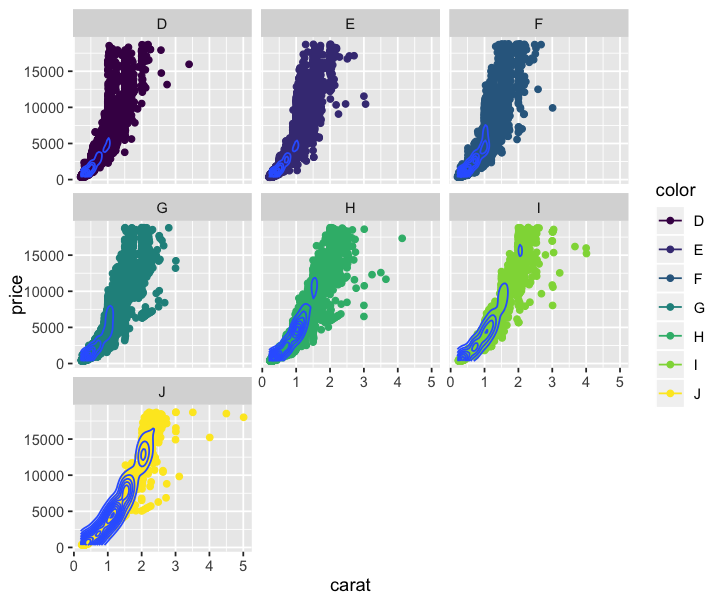

In [119]:
# 시각화 그림 사이즈 조정
options(repr.plot.width = 6, repr.plot.height = 5)

# review 데이터 시각화
# EDA에서도 기본적인 데이터의 분포나 시계열패턴등을 확인
ggplot(data = diamonds, aes( x = carat, y = price)) +
geom_point(aes(color = color)) + facet_wrap( ~color) +
geom_density2d()

In [315]:
# https://www.kaggle.com/rockbottom73/crude-oil-prices/downloads/crude-oil-prices.zip/1

library(readxl)
# read_excel() : default로 첫번째 시트 자료 읽어드림
raw <- read_excel('DATA/Crude Oil Prices Daily.xlsx')
head(raw)
tail(raw)

Date,Closing Value
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87
1986-01-09,26.03


Date,Closing Value
2018-07-02,73.89
2018-07-03,74.19
2018-07-04,NA
2018-07-05,73.05
2018-07-06,73.78
2018-07-09,73.93


In [318]:
# 단일 시계열 데이터 시각화, 종가가 최대였을대의 시점
cv_max <- raw$Date[which(raw$`Closing Value`== max(raw$`Closing Value`, na.rm = TRUE))]
cv_max

[1] "2008-07-03 UTC"

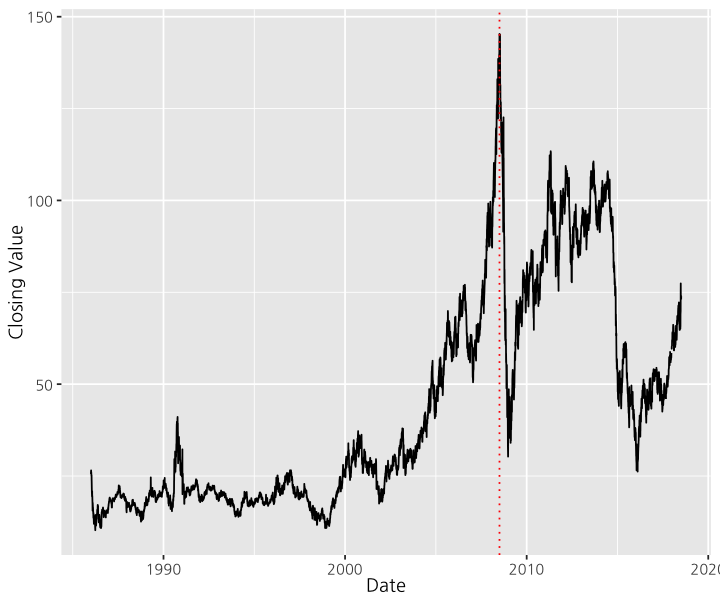

In [312]:
ggplot(raw, aes(x = Date, y = `Closing Value`)) +
geom_line() +
geom_vline(xintercept = as.numeric(cv_max),
          linetype = 3, colour = "red") 

In [322]:
df <- data.frame(Date = raw$Date, 
           year = as.numeric(format(raw$Date, format = "%Y")), 
           month = as.numeric(format(raw$Date, format = "%m")),
           day = as.numeric(format(raw$Date, format = "%d")),
           closing_value = raw$`Closing Value`
                )
head(df)
str(df)

Date,year,month,day,closing_value
1986-01-02,1986,1,2,25.56
1986-01-03,1986,1,3,26.00
1986-01-06,1986,1,6,26.53
1986-01-07,1986,1,7,25.85
1986-01-08,1986,1,8,25.87
1986-01-09,1986,1,9,26.03


'data.frame':	8223 obs. of  5 variables:
 $ Date         : POSIXct, format: "1986-01-02" "1986-01-03" ...
 $ year         : num  1986 1986 1986 1986 1986 ...
 $ month        : num  1 1 1 1 1 1 1 1 1 1 ...
 $ day          : num  2 3 6 7 8 9 10 13 14 15 ...
 $ closing_value: num  25.6 26 26.5 25.9 25.9 ...


In [323]:
# 수치 데이터를 변환 날짜로
df$year <- as.factor(df$year)
df$month <- as.factor(df$month)
str(df)

'data.frame':	8223 obs. of  5 variables:
 $ Date         : POSIXct, format: "1986-01-02" "1986-01-03" ...
 $ year         : Factor w/ 33 levels "1986","1987",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ month        : Factor w/ 12 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ day          : num  2 3 6 7 8 9 10 13 14 15 ...
 $ closing_value: num  25.6 26 26.5 25.9 25.9 ...


In [324]:
# 경고 문구 무시 옵션
options(warn = -1)

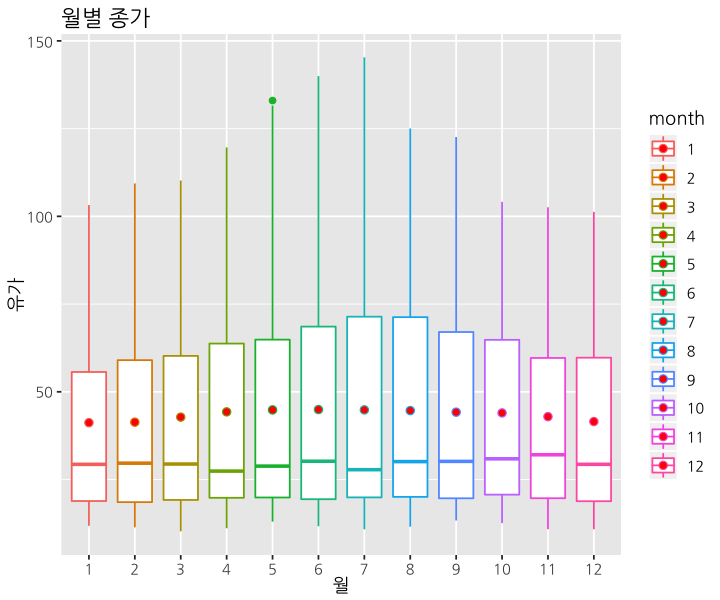

In [325]:
# 월별 데이터 상자그림
ggplot(df, aes(x = month, y = closing_value, group = month, col = month)) +
geom_boxplot() +
stat_summary(fun.y = "mean", geom= "point", shape = 21, size = 2, fill = "red") +
labs(title = "월별 종가", x = "월", y = "유가")  +
theme(text = element_text(family = "NanumGothic"))

## 8. 데이터 전처리

In [67]:
# 결측치 데이터 (missing data) 생성

x <- c(1, 2, NA, 5, 2, NA, 3)
x

[1]  1  2 NA  5  2 NA  3

In [68]:
# is.na함수로 na유무를 논리값으로 확인
is.na(x)

[1] FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE

In [69]:
# 결측치가 있는 경우 연산
mean(x)

[1] NA

In [70]:
# 결측치 계산을 위한 매개변수 설정 활용
mean(x, na.rm = TRUE)

[1] 2.6

In [71]:
# 기본 합, 표준편차, 분산함수의 경우 na제외하고 계산 가능
sum(x, na.rm = T)
sd(x, na.rm = T)
var(x, na.rm = T)

[1] 13

[1] 1.516575

[1] 2.3

In [72]:
# NULL값이 들어간 벡터 변수 생성
y <- c(1, NULL, 3)
y

[1] 1 3

In [73]:
# is.null함수의 경우 개별 값으로 묻지 않고 벡터 전체
# NULL이외의 값이 들어있는 경우 NULL이 포함되더라도 FALSE
is.null(y)

[1] FALSE

In [75]:
# 파이프 오퍼레이터 활용, dplyr에서도 활용
library(magrittr)

# 벡터 생성
x <- 1:10

# 함수 내 직접 매개변수 표기
mean(x)

# 초기 input변수에 대한 확인이 쉬움
# 초기값은 가장 좌측에 입력되는것으로 인색
x %>% mean

[1] 5.5

[1] 5.5

In [113]:
# 결측값 갯수 확인
z <- c(1, 2, 3, NA, 5, 6, 7, NA, NA)
sum(is.na(z))

[1] 3

In [114]:
# 파이프연산자 활용시 장점 : 코드 시안성이 좋아짐
z %>% is.na %>% sum

[1] 3

In [115]:
# 평균값으로 대체하는 경우
z # 기존
z[is.na(z)] <- mean(z, na.rm = TRUE)
z # 대체

[1]  1  2  3 NA  5  6  7 NA NA

[1] 1 2 3 4 5 6 7 4 4

In [116]:
z_normal <- (z - mean(z)) /sd(z)
z_normal

[1] -1.6035675 -1.0690450 -0.5345225  0.0000000  0.5345225  1.0690450  1.6035675
[8]  0.0000000  0.0000000

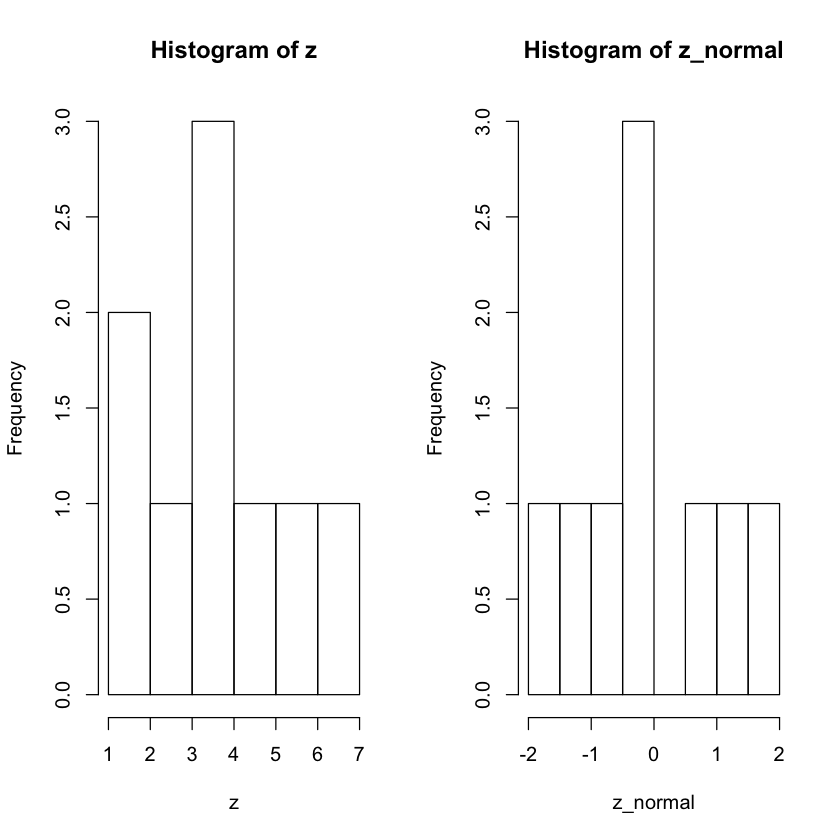

In [117]:
par(mfrow = c(1, 2))

hist(z)
hist(z_normal)

In [225]:
# 문자열 데이터(Manipulating strings)
# 범주형 데이터의 경우 특정 이름이나 명칭이 
# 다를 수 있기 때문에 데이터 변환 과정에서 필요

paste("SK", "이노베이션", sep = "_")

[1] "SK_이노베이션"

In [226]:
x <- c("인천석유화학", "에너지", "종합화학",
       "루브리컨츠", "트레이딩인터네셔널", "아이테크놀로지")

y <- c('SK_인천석유화학', 'SK_에너지', 'SK_종합화학',
       'SK_루브리컨츠', 'SK_트레이딩인터네셔널', 'SK_아이테크놀로지')

In [227]:
# 회사 이름 명이  데이터에서 다르게 인식되는 경우
x == y

[1] FALSE FALSE FALSE FALSE FALSE FALSE

In [228]:
# rep함수 활용 문자열 6번 반복
rep("SK", 6)

[1] "SK" "SK" "SK" "SK" "SK" "SK"

In [229]:
# paste함수를 활용하여 벡터를 결합
ed_list <- paste(rep("SK", 6), 
                 c("인천석유화학", "에너지", "종합화학",
                   "루브리컨츠", "트레이딩인터네셔널", "아이테크놀로지"),
                 sep = "_")
ed_list

[1] "SK_인천석유화학"       "SK_에너지"             "SK_종합화학"          
[4] "SK_루브리컨츠"         "SK_트레이딩인터네셔널" "SK_아이테크놀로지"

In [230]:
ed_list == y

[1] TRUE TRUE TRUE TRUE TRUE TRUE

In [231]:
# identical 함수를 활용하여 완전히 동일한지 확인
identical(ed_list, y)

[1] TRUE

In [232]:
sprintf("안녕하세요. %s, 반갑습니다.", ed_list)

[1] "안녕하세요. SK_인천석유화학, 반갑습니다."      
[2] "안녕하세요. SK_에너지, 반갑습니다."            
[3] "안녕하세요. SK_종합화학, 반갑습니다."          
[4] "안녕하세요. SK_루브리컨츠, 반갑습니다."        
[5] "안녕하세요. SK_트레이딩인터네셔널, 반갑습니다."
[6] "안녕하세요. SK_아이테크놀로지, 반갑습니다."

In [233]:
sprintf("주요업정 분류로 %s, %s입니까?.",
        c("원유정제 처리업", "석유제품 생산/판매", "화학제품 생산/판매",
          "고급기유", "기타상품 중개업", "정보전자소재" )
          , ed_list)

[1] "주요업정 분류로 원유정제 처리업, SK_인천석유화학입니까?."      
[2] "주요업정 분류로 석유제품 생산/판매, SK_에너지입니까?."         
[3] "주요업정 분류로 화학제품 생산/판매, SK_종합화학입니까?."       
[4] "주요업정 분류로 고급기유, SK_루브리컨츠입니까?."               
[5] "주요업정 분류로 기타상품 중개업, SK_트레이딩인터네셔널입니까?."
[6] "주요업정 분류로 정보전자소재, SK_아이테크놀로지입니까?."

## 9 통계 이해하기

In [234]:
# 확률 분포(Probabilty Distribution)
# 표준정규분포함수 (rnorm) : 정규분포내 임의 값 생성
# 확률밀도함수(dnorm) 
# 누적분포 함수(pnorm) : 정규분포의 누적값(면적)
# 분위수함수(qnorm) : 확률을 입력하면 해당 변수 값을 찾아줌

# 표준정규분포(Normal Distribution) 통해서 랜덤 생성
rnorm(n = 5)

# 평균(mean)과 표준편차(standard deviation) 값을 
# 주어진 상태에서 랜덤 추출개수(n)
rnorm(n = 5, mean = 100, sd = 20)

[1] -1.6068564  0.8056628 -0.1148647  0.5325397  0.7852749

[1] 117.13942 105.44101  71.40137 111.99021 122.08727

In [235]:
# 밀도(density ; the probability of a prticular value)

rnorm(5)
dnorm(rnorm(5))

[1] -0.2091357 -0.3364863 -0.3113718 -0.4870275 -0.7060686

[1] 0.2881671 0.3766230 0.3927694 0.2401096 0.3983863

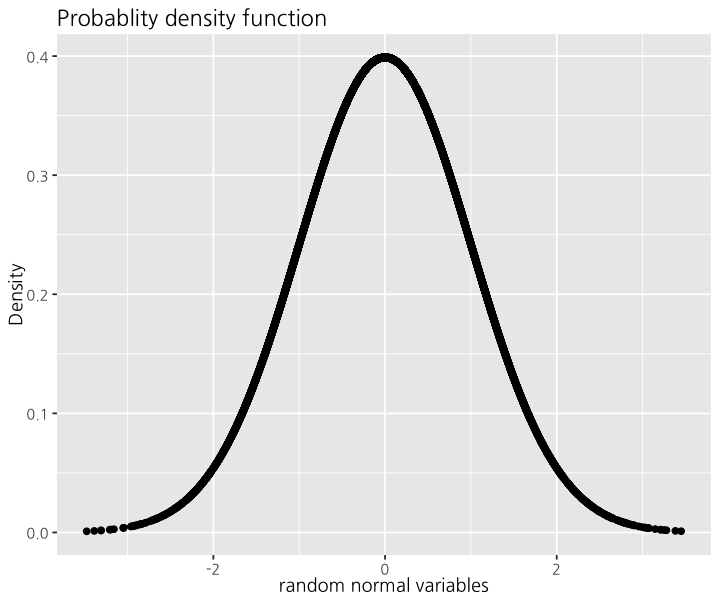

In [236]:
# 확률분포 시각화
library(ggplot2)

rno <- rnorm(10000)
dno <- dnorm(rno)
rand <- data.frame(x = rno, y = dno)

ggplot(rand, aes(x = x, y = y)) + geom_point() +
labs(title = "Probablity density function", x = "random normal variables",
    y = "Density")

In [237]:
# 데이터 생성
x_seq <- seq(from = -1, to = 1, by = .1)
y_seq <- dnorm(x_seq)
cover <- data.frame(x = x_seq, y = y_seq)
head(cover)

x,y
-1.0,0.2419707
-0.9,0.2660852
-0.8,0.2896916
-0.7,0.3122539
-0.6,0.3332246
-0.5,0.3520653


In [239]:
tot <- rbind(c(min(cover$x), 0),cover ,c(max(cover$x), 0))
head(tot)

x,y
-1.0,0.0000000
-1.0,0.2419707
-0.9,0.2660852
-0.8,0.2896916
-0.7,0.3122539
-0.6,0.3332246


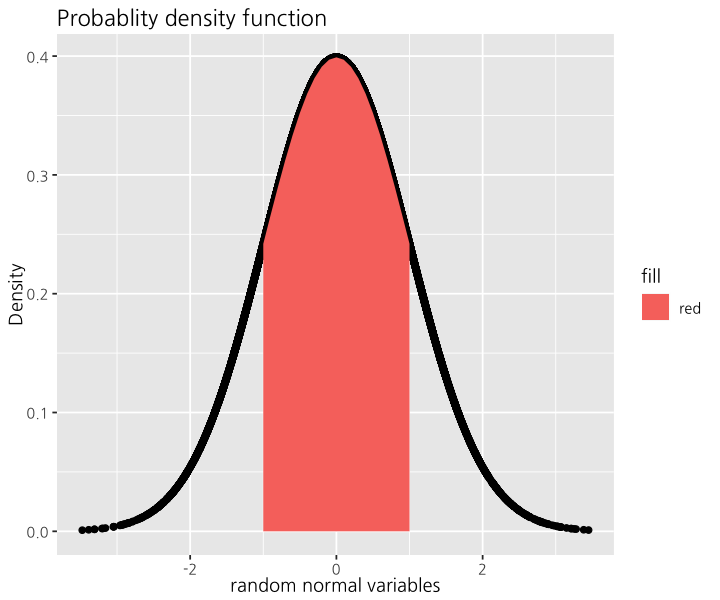

In [240]:
# ggplot을 활용해 확률밀도 함수 값에 대한 시각화

ggplot(rand, aes(x = x, y = y)) + 
geom_point() +
labs(title = "Probablity density function",
     x = "random normal variables",
     y = "Density") + 
geom_polygon(data = tot, aes( x= x, y = y, fill = "red"))

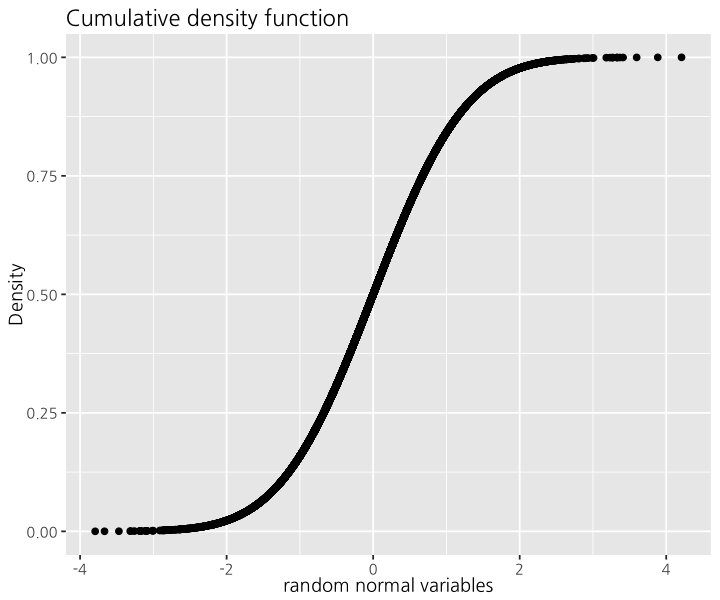

In [241]:
# 누적확률분포값 시각화

library(ggplot2)

rno <- rnorm(10000)
dno <- pnorm(rno)
rand <- data.frame(x = rno, y = dno)

ggplot(rand, aes(x = x, y = y)) + 
geom_point() +
labs(title = "Cumulative density function", 
     x = "random normal variables",
     y = "Density")

In [242]:
# 이항분포(binomial distribution)
# n번 독립적 시행에서 각 시행의 확률이 p를 갖는 경우의 확률분포
# p(x; n, p)

rbinom(n = 1, size = 10, prob = .4)

[1] 7

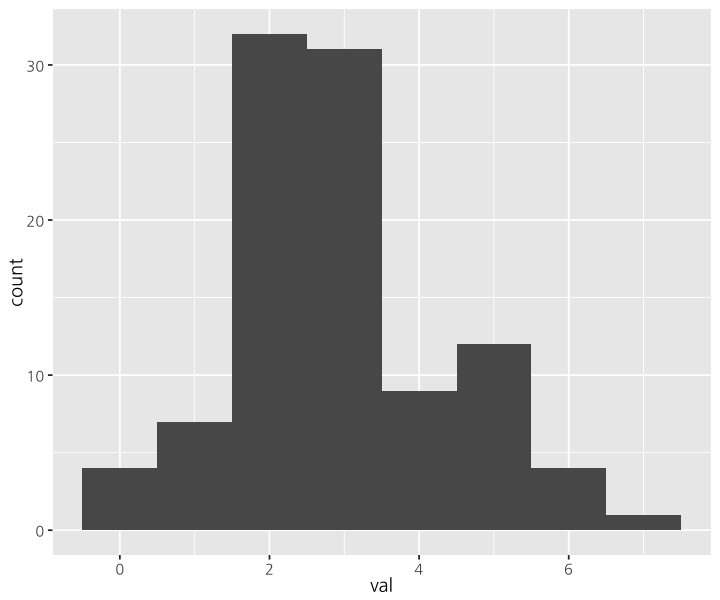

In [245]:
# 이항분포 시각화 예시
binom <- data.frame(val = rbinom(100, 10, .3))
ggplot(binom, aes( x = val)) + geom_histogram(binwidth = 1)

In [255]:
# 푸아송 분포 (Poisson Distribution)
# 이항 분포의 특수항 형태 
# n이 대단히 크고 , p가 작을때 푸아송 분포로 근사
# p(x; lambda)


pois1 <- rpois(n = 10000, lambda = 1)
pois2 <- rpois(n = 10000, lambda = 2)
pois5<- rpois(n = 10000, lambda = 5)
pois20 <- rpois(n = 10000, lambda = 20)


pois <- data.frame(l.1 = pois1, l.2 = pois2, l.5 = pois5, l.20 = pois20)
pois <- melt(pois)
colnames(pois) <- c("Lambda", "x")

No id variables; using all as measure variables


In [256]:
library(stringr)
 pois$Lambda <-str_extract(string = pois$Lambda, pattern = "\\d+")
head(pois)

Lambda,x
1,0
1,0
1,3
1,2
1,4
1,1


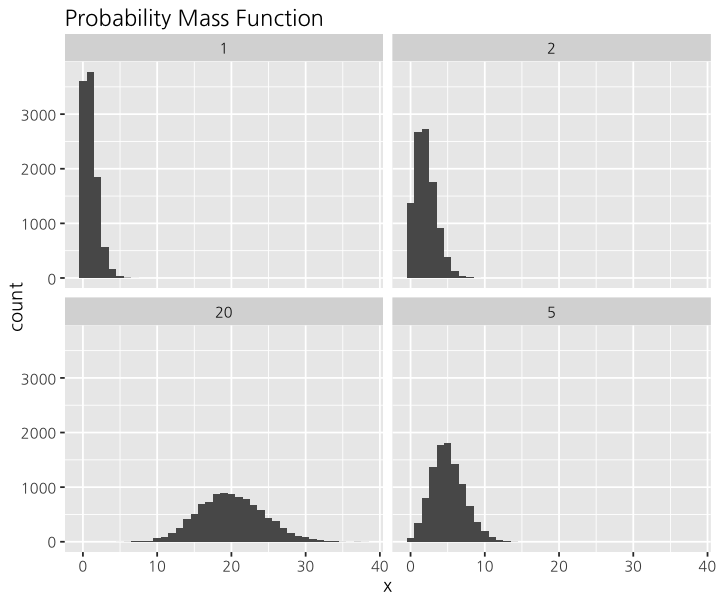

In [259]:
# 람다(lambda)에 따른 확률질량함수
ggplot(pois, aes(x = x)) + 
geom_histogram(binwidth = 1)  +
facet_wrap(~ Lambda) + ggtitle("Probability Mass Function")

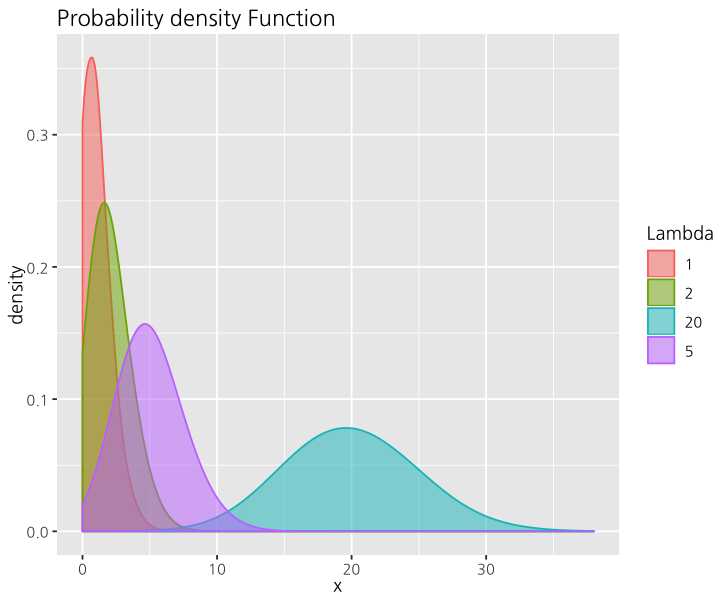

In [261]:
# 람다 변화값에 따른 확률밀도함수
ggplot(pois, aes(x = x)) + 
geom_density(aes(group = Lambda, color = Lambda, fill = Lambda),
            adjust = 4, alpha = .5) + 
scale_color_discrete() + scale_fill_discrete() +
ggtitle("Probability density Function")

### 참고) 다양한 분포
* http://www.math.wm.edu/~leemis/chart/UDR/UDR.html
* Normal
* Binomial
* Poisson
* t
* F
* Chie-Squared
* Gamma
* Geometric
* Negative Binomial
* Exponential
* Weibull
* Uniform
* Beta
* Cauchy
* Multinomial
* Hypergeometric
* Log-norma
* Logistic 

### 기술통계(descriptive Statistics, Basic Statistics)
* Summary Statistics
  * mean()
  * var()
  * cov()
  * corr()

In [189]:
x <- c(100, 85, 78, 90, 80)

# 평균
mean(x)

[1] 86.6

In [190]:
# 분산함수
var(x)

# 수식
sum((x - mean(x)) ^ 2)/ (length(x) -1)

[1] 77.8

[1] 77.8

In [191]:
# 표준편차
sqrt(var(x))
sd(x)

[1] 8.820431

[1] 8.820431

In [192]:
# 최소
min(x)

# 최대
max(x)

# 중앙값
median(x)

[1] 78

[1] 100

[1] 85

In [193]:
# 4분위함수
quantile(x)

0%  25%  50%  75% 100% 
  78   80   85   90  100

In [194]:
# 매개변수 probs에 대한 구간
quantile(x, probs = c(.26, .75))

26%  75% 
80.2 90.0

In [195]:
# summary함수를 활용하여 기초통계량 확인
summary(x)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   78.0    80.0    85.0    86.6    90.0   100.0 

In [197]:
# 상관관계(covariance, corrlation)

# ggplot2 예제 데이터 활용
library(ggplot2)
head(economics)

date,pce,pop,psavert,uempmed,unemploy
1967-07-01,506.7,198712,12.6,4.5,2944
1967-08-01,509.8,198911,12.6,4.7,2945
1967-09-01,515.6,199113,11.9,4.6,2958
1967-10-01,512.2,199311,12.9,4.9,3143
1967-11-01,517.4,199498,12.8,4.7,3066
1967-12-01,525.1,199657,11.8,4.8,3018


In [271]:
x1 <- economics$pce
x2 <- economics$ psavert

cor(x1, x2)

[1] -0.7928546

In [272]:
sum((x1 - mean(x1)) * (x2 - mean(x2)))  / 
(nrow(economics) * sd(x1) * sd(x2) )

[1] -0.7914733

In [273]:
# 공분산(covariance)
cov(x1, x2)

[1] -8359.069

In [201]:
sum((x1 - mean(x1)) * (x2 - mean(x2))) / (nrow(economics))

[1] -8344.506

In [202]:
cov(x1, x2) == cor(x1, x2) * sd(x1) * sd(x2)

[1] TRUE

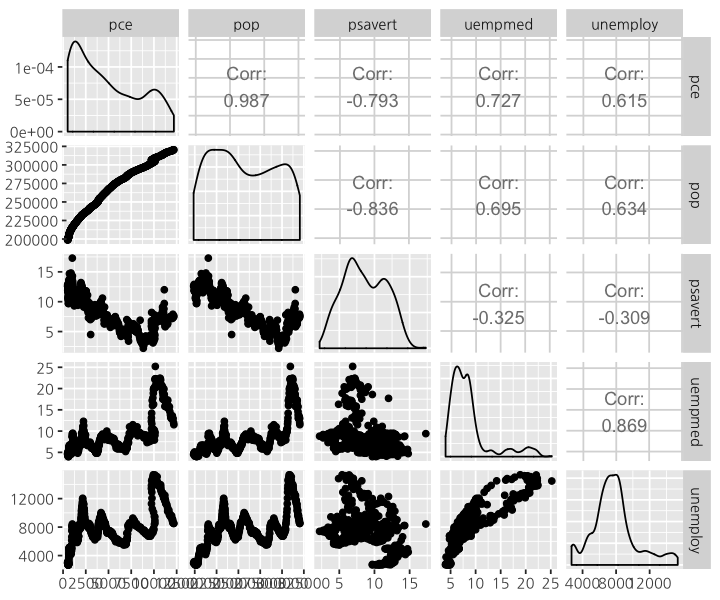

In [268]:
# 상관관계(correlation) 시각화
library(GGally)

ggpairs(economics[,-1])

In [274]:
data(tips, package = "reshape2")
head(tips)

total_bill,tip,sex,smoker,day,time,size
16.99,1.01,Female,No,Sun,Dinner,2
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.50,Male,No,Sun,Dinner,3
23.68,3.31,Male,No,Sun,Dinner,2
24.59,3.61,Female,No,Sun,Dinner,4
25.29,4.71,Male,No,Sun,Dinner,4


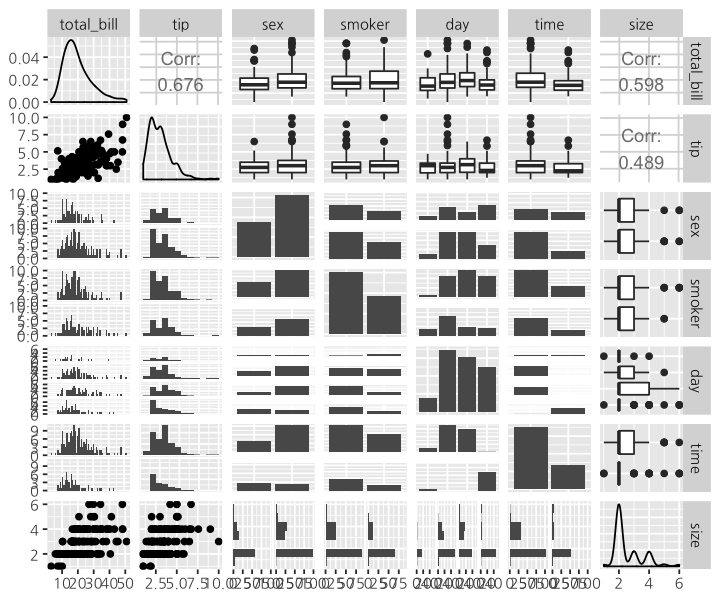

In [289]:
ggpairs(tips, lower=list(combo=wrap("facethist", binwidth=0.8)))

### T-test

In [208]:
head(tips)

total_bill,tip,sex,smoker,day,time,size
16.99,1.01,Female,No,Sun,Dinner,2
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.50,Male,No,Sun,Dinner,3
23.68,3.31,Male,No,Sun,Dinner,2
24.59,3.61,Female,No,Sun,Dinner,4
25.29,4.71,Male,No,Sun,Dinner,4


In [209]:
unique(tips$sex)

[1] Female Male  
Levels: Female Male

In [210]:
unique(tips$day)

[1] Sun  Sat  Thur Fri 
Levels: Fri Sat Sun Thur

In [292]:
# one-sample t-test

tipTtest <- t.test(tips$tip, alternative = "two.sided", mu = 2.50)
tipTtest 


	One Sample t-test

data:  tips$tip
t = 5.6253, df = 243, p-value = 5.08e-08
alternative hypothesis: true mean is not equal to 2.5
95 percent confidence interval:
 2.823799 3.172758
sample estimates:
mean of x 
 2.998279 


In [294]:
# T분포에서 데이터 생성
randT <- rt(30000, df = NROW(tips) -1)

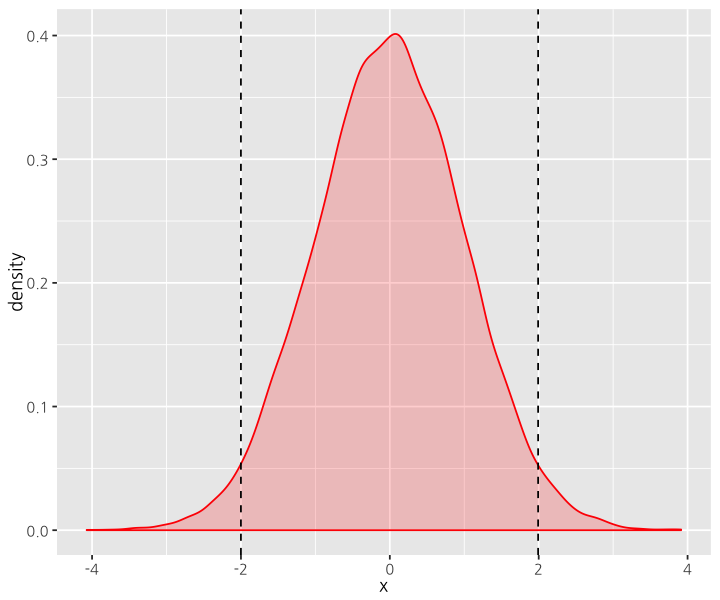

In [295]:
ggplot(data.frame(x = randT)) + 
geom_density(aes(x = x), fill = "red", color = "red", alpha = .2) +
geom_vline(xintercept = tipTtest$statistics) + 
geom_vline(xintercept = mean(randT) + c(-2, 2)*sd(randT), linetype = 2)

In [296]:
t.test(tips$tip, alternative = "greater", mu = 2.5)


	One Sample t-test

data:  tips$tip
t = 5.6253, df = 243, p-value = 2.54e-08
alternative hypothesis: true mean is greater than 2.5
95 percent confidence interval:
 2.852023      Inf
sample estimates:
mean of x 
 2.998279 


In [215]:
# Two-sample T-test

aggregate(tip ~ sex, data = tips, var)

sex,tip
Female,1.344428
Male,2.217424


In [216]:
# 정규성 검정 
shapiro.test(tips$tip)


	Shapiro-Wilk normality test

data:  tips$tip
W = 0.89781, p-value = 8.2e-12


In [217]:
shapiro.test(tips$tip[tips$sex == "Female"])


	Shapiro-Wilk normality test

data:  tips$tip[tips$sex == "Female"]
W = 0.95678, p-value = 0.005448


In [218]:
shapiro.test(tips$tip[tips$sex == "Male"])


	Shapiro-Wilk normality test

data:  tips$tip[tips$sex == "Male"]
W = 0.87587, p-value = 3.708e-10


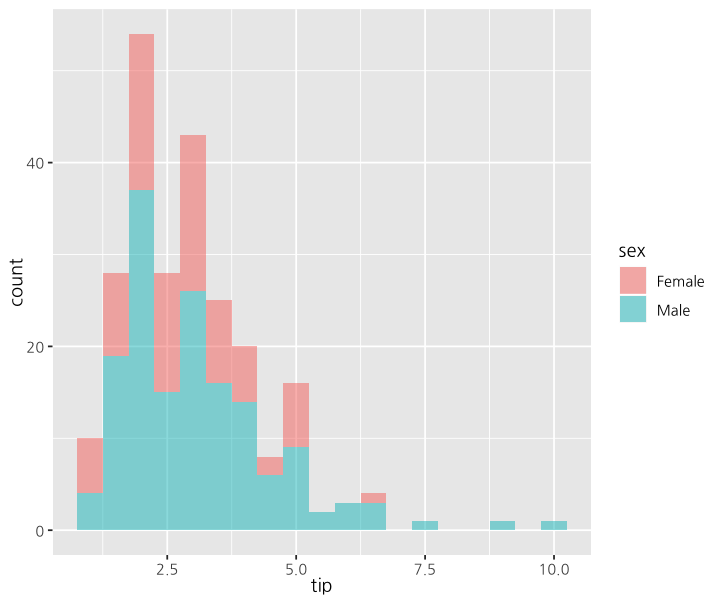

In [301]:
# 성별에 따른 팁정도에 따른 빈도
ggplot(tips, aes(x = tip, fill = sex)) + 
geom_histogram(binwidth = .5, alpha = .5)

In [302]:
ansari.test(tip ~ sex, tips)


	Ansari-Bradley test

data:  tip by sex
AB = 5582.5, p-value = 0.376
alternative hypothesis: true ratio of scales is not equal to 1


In [221]:
t.test(tip ~ sex, data = tips, var.equal = TRUE)


	Two Sample t-test

data:  tip by sex
t = -1.3879, df = 242, p-value = 0.1665
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.6197558  0.1074167
sample estimates:
mean in group Female   mean in group Male 
            2.833448             3.089618 


In [306]:
# 시각화를 위한 데이터 정리
library(plyr)

tipsummary <- ddply(tips, "sex", summarize, 
                    tip.mean = mean(tip), 
                    tip.sd   = sd(tip), 
                    lower = tip.mean -2*tip.sd/sqrt(NROW(tip)), 
                    upper = tip.mean  + 2*tip.sd/sqrt(NROW(tip)))

tipsummary

sex,tip.mean,tip.sd,lower,upper
Female,2.833448,1.159495,2.584827,3.082070
Male,3.089618,1.489102,2.851931,3.327304


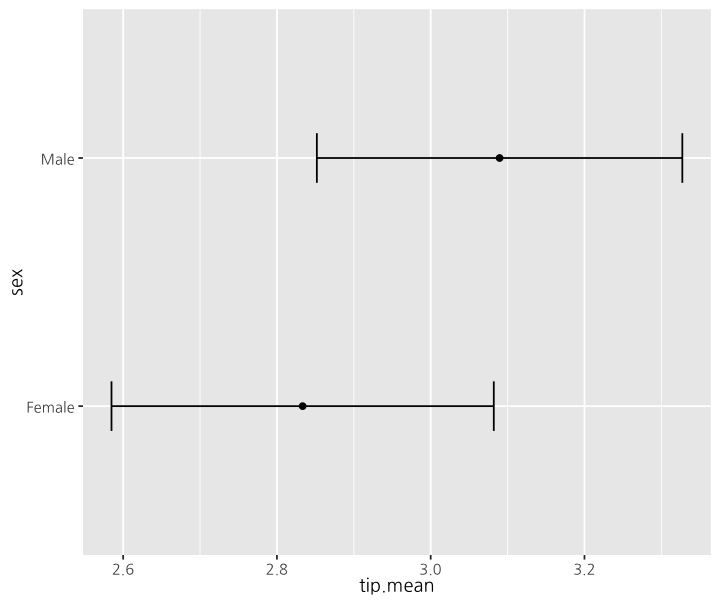

In [307]:
# 평균간의 차이 확인
ggplot(tipsummary, aes(x = tip.mean, y = sex)) + geom_point() + 
geom_errorbarh(aes(xmin = lower, xmax = upper), height = .2)

### ANOVA

In [ ]:
tip_anova <- aov(tip ~ day -1 , tips)
tip_anova

In [ ]:
tip_anova$coefficients

In [ ]:
summary(tip_anova)

In [ ]:
tipsbyday <- ddply(tips, "day", plyr::summarize, tip.mean = mean(tip), tip.sd = sd(tip), Length = NROW(tip), tfrac= qt(p= .90, df = Length -1),
                  lower = tip.mean - tfrac*tip.sd/sqrt(Length), upper = tip.mean + tfrac*tip.sd/sqrt(Length))
tipsbyday

In [ ]:
ggplot(tipsbyday, aes(x = tip.mean, y = day)) + geom_point() +
geom_errorbarh(aes(xmin = lower, xmax = upper), height = .3)